In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 4)

In [6]:
import seaborn as sns

In [7]:
#allow plots to appear within the notebook
%matplotlib inline

In [8]:
import warnings 
warnings.filterwarnings('ignore')

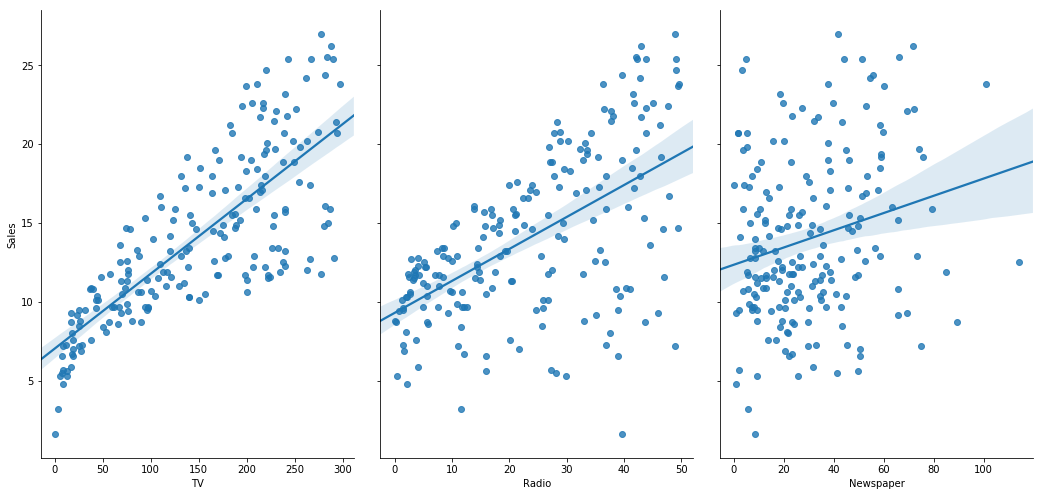

In [9]:
#visualize the relationship 
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7,aspect=0.7 , kind='reg')

In [10]:
#create a  python list for feature names
feature_cols = ['TV','Radio','Newspaper']

# use the list to select a subset of the original Dataframe
X = data[feature_cols]

X.head()


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
print(X.shape)

(200, 3)


In [12]:
y = data['Sales']

y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [13]:
print(y.shape)

(200,)


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [17]:
from sklearn.linear_model import LinearRegression 
#instantaited
linreg = LinearRegression()
#fit the model to the training data 
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
print(linreg.intercept_)

print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [22]:
#pair the feature names with the coeffcients 

list(zip(feature_cols,linreg.coef_))

[('TV', 0.04656456787415028),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

In [23]:
#make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred[:5]


array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ])

In [24]:
y_test[:5]

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: Sales, dtype: float64

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error , r2_score

In [26]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

1.4046514230328955


In [27]:
r2_score(y_test,y_pred)

0.9156213613792232

# lets remove one variable at a time


In [28]:
feature_cols = ['TV','Radio']

X =data[feature_cols]

y = data.Sales


X_train , X_test , y_train , y_test = train_test_split(X,y, random_state= 1)


linreg.fit(X_train, y_train)

y_pred =linreg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,y_pred)))


print(r2_score(y_test,y_pred))



1.3879034699382888
0.9176214942248908


In [30]:
feature_cols = ['Newspaper','Radio']

X = data[feature_cols]

y = data.Sales

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 1)


linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)


print(np.sqrt(mean_squared_error(y_test,y_pred)))

print(r2_score(y_test,y_pred))









3.748697497467727
0.399025313368911


In [31]:
feature_cols = ['Newspaper','TV']

X = data[feature_cols]

y = data.Sales

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 1)


linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)


print(np.sqrt(mean_squared_error(y_test,y_pred)))

print(r2_score(y_test,y_pred))



3.352056334433862
0.5194727680455272


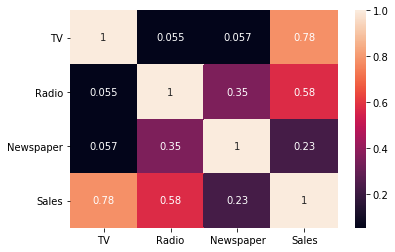

In [32]:
corr = data.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True)